<p style="font-size:23px;font-family:'Ubuntu'">Finding the shortest path on image</p>
<br>

This worksheet represents implementation of [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to find the shortest path from one point to another in the image. The image will be represented as a [Hypsometric tints](https://en.wikipedia.org/wiki/Hypsometric_tints). That means that every point (pixel) shows different elevation level. Choosing the path through the the lowest elevation levels is considered to be the most efficient choice. 
<br>

modules used in this worksheet includes **matplotlib** pyplot, **scipy** for interpolation and distance computations, **heapq** that provides an implementation of the heap queue algorithm, also known as the priority queue algorithm, **imageio** to play with image and **numpy**;

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# a simple demonstration on what numpy allows you to do with arrays;

In [9]:
np.array([1,2,3,4,5]);

In [10]:
domain = np.arange(1, 10)
domain;

In [11]:
squares = domain ** 4
squares;

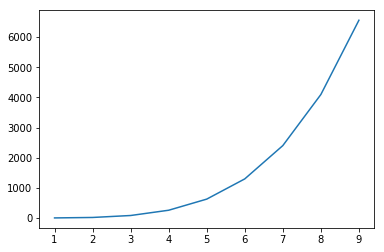

In [13]:
plt.plot(domain, squares);

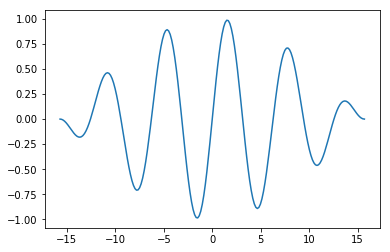

In [16]:
domain = np.linspace(-5*np.pi, 5*np.pi, num=200)
sinus = np.sin(domain) * np.cos(domain/10)
plt.plot(domain, sinus);

In [41]:
heights = np.array([[2, 1, 5, 6], [3, 8, 7, 4]])
heights # two dimensional numpy array heights

array([[2, 1, 5, 6],
       [3, 8, 7, 4]])

In [21]:
heights.shape 

(2, 4)

In [27]:
terrain = np.random.random((10, 10)) # initialization of the map

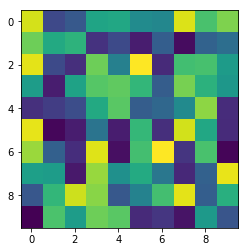

In [47]:
plt.imshow(terrain);

In [30]:
def interpolate(array, new_shape):
    """ interpolation of our array """
    
    from scipy.interpolate import RectBivariateSpline
    
    # prepare source coordinates
    old_xs, old_ys = (np.arange(dim) for dim in array.shape)
    
    # return evenly spaced numbers over a specified interval.
    new_xs, new_ys = (np.linspace(0, old_dim-1, num=new_dim) 
                      for new_dim, old_dim 
                      in zip(new_shape, array.shape))
    
    # bivariate spline approximation over a rectangular mesh
    interpolation = RectBivariateSpline(old_xs, old_ys, array)
    
    return interpolation(new_xs, new_ys)

In [31]:
a = np.arange(16).reshape((4, 4))
np.around(interpolate(a, (7, 7)), 1)

array([[ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ],
       [ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ],
       [ 4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ],
       [ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ],
       [ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ],
       [10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ],
       [12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]])

In [32]:
def gen_terrain(shape=(10, 10), height=100, smooth=10):
    """ generate random map and interpolate it """
    
    dimensions = np.array([*shape])
    terrain = np.random.random(dimensions)
    return interpolate(terrain, dimensions * smooth) * height

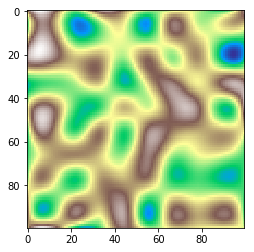

In [33]:
plt.imshow(gen_terrain(smooth=10), cmap='terrain'); #https://matplotlib.org/examples/color/colormaps_reference.html

In [36]:
def inside(array, point):
    """ check if point(pixel) is inside an area """
    
    rows, cols = array.shape
    r, c = point
    return 0 <= r < rows and 0 <= c < cols

In [40]:
hills = heights > 6 # hills are values in the map that are greater than 6

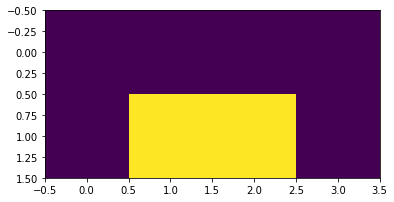

In [42]:
plt.imshow(hills);

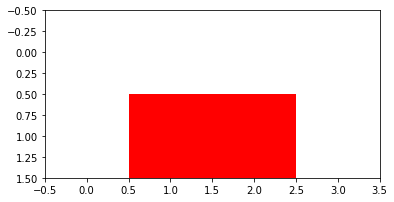

In [43]:
import numpy.ma as ma
masked_hills = ma.masked_array(hills, ~hills)
plt.imshow(masked_hills, cmap='hsv');

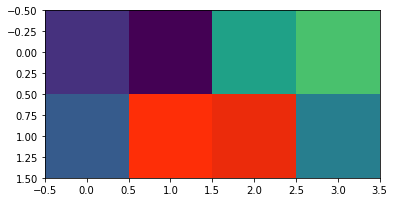

In [44]:
plt.imshow(heights)
plt.imshow(masked_hills, cmap='hsv', alpha=0.8)

In [45]:
def imshow_overlay(array, overlay, **kwargs):
    """ show overlayed image """
    
    plt.imshow(array, **kwargs)
    layer = ma.masked_where(~overlay, overlay)
    plt.imshow(layer, cmap='hsv')
    plt.show()

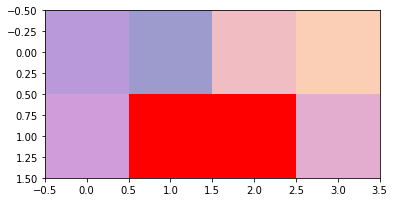

In [46]:
imshow_overlay(heights, hills, cmap='plasma', alpha=0.4)

In [48]:
def neighbourhood_4way(point):
    row, col = point
    scope = (-1, 1)
    
    for dr in scope: yield row+dr, col
    for dc in scope: yield row, col+dc

In [50]:
def show_neighbourhood(array, point, neighbourhood):
    """ show neighbourhood of our point in the terrain """
    
    neighbours = np.full(array.shape, False) # map terrain to full 0s array
    indices = zip(*neighbourhood(point))
    neighbours[[*indices]] = True # now map has some 1s fields that are neighbours of our point
    imshow_overlay(array, neighbours) 

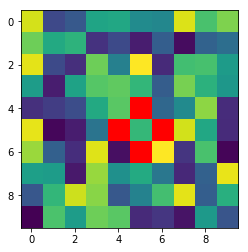

In [51]:
show_neighbourhood(terrain, (5,5), neighbourhood_4way)